## Разведочный анализ

Подключитесь к базе данных PostgreSQL и выгрузите таблицу `exploratory`, сохранив ее в датафрейм. <br> <br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `db_ds_students`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`.

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')
import numpy as np
from datetime import datetime, timedelta
import os
import sys
import missingno as msno

import psycopg2
import pandas as pd
import sqlite3
from scipy.stats import kurtosis
from scipy.stats import skew

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "db_ds_students",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)

cursor = conn.cursor()

# Получаем имена таблиц из базы данных
sql_str = "SELECT * FROM exploratory;"
cursor.execute(sql_str)

df = pd.read_sql_query(sql_str, conn)
df.head()


,feature_1,feature_2,feature_3,feature_4,feature_5
0,2.4399302341553932,-2.180960698389708,33.4684964804719,-1.9273880121739875,-5.3213919475057105
1,1.7705797495879034,-1.174880454210172,0.9895926481354946,-1.1396809115663187,-2.0802195404111687
2,0.7428169764168391,-0.2634829113111655,0.16814863490368492,-0.3324379721161745,-0.19571957951766614
3,-1.510891800324271,2.7125712625192238,-2.6856430298672915,2.0584952423727403,-4.098401678335551
4,-0.4835110394772655,0.096511221663355,-0.028703495808161117,0.1687629004635419,-0.04666424110766956


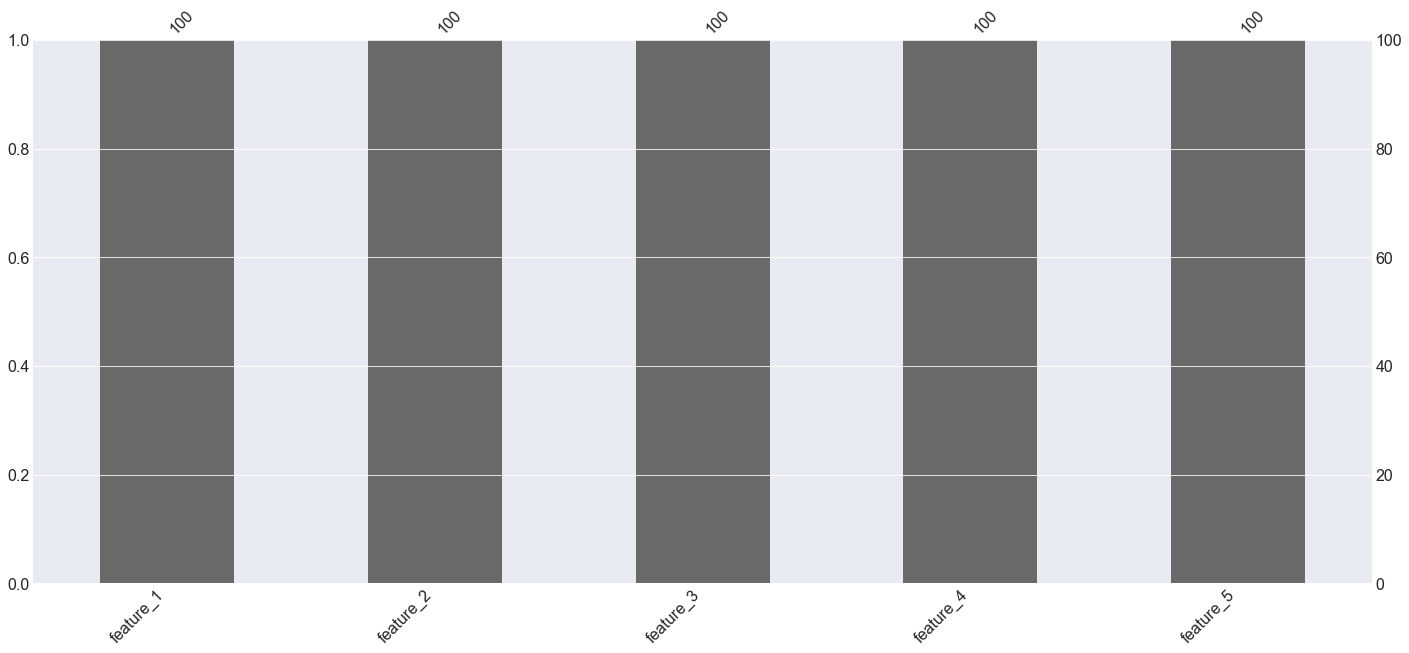

In [2]:
msno.bar(df)

Постройте гистограммы распределения для каждой переменной. Поэксперементируйте с количеством "разбивок" (bins). Опишите распределение каждой переменной. В каких областях (пример: от нуля до 2 расположено примерно треть всех значений) сосредоточено больше значений, в каких меньше. 

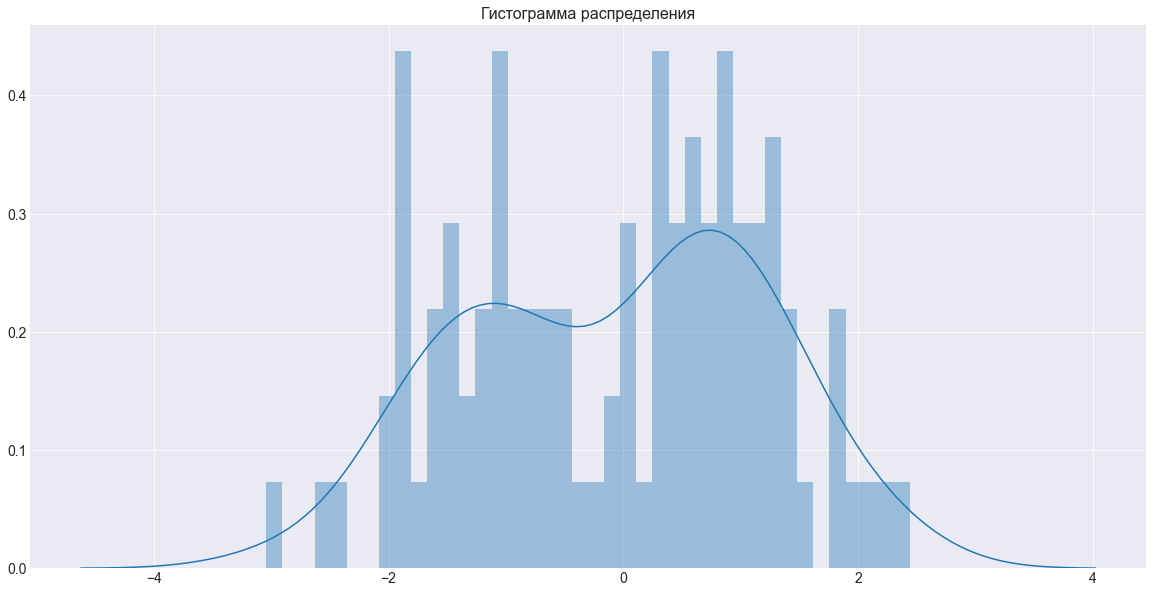

In [8]:
plt.figure(figsize=(20,10))
plt.title("Гистограмма распределения", fontsize=16)
plt.tick_params(labelsize=14)

sns.distplot(df['feature_1'], axlabel=False, bins=40)
plt.show()

## Вывод по графику "feature_1":
По данному графику мжно сделать следующий вывод, данный график имеет нормальное распределение, возможно тут нужно разбить данные на 2 сегмента. Большая часть значений находится в промежаутке от -2 до 2. В качестве примера, данные можно посмотреть с большим количеством разбиения, что нам в дальнейшем позволит увидеть часто встречаемые занчения.
Или же попробовать вариант с меньшим количеством разбиения, это позволит нам лучше увидеть общею зависимоть.

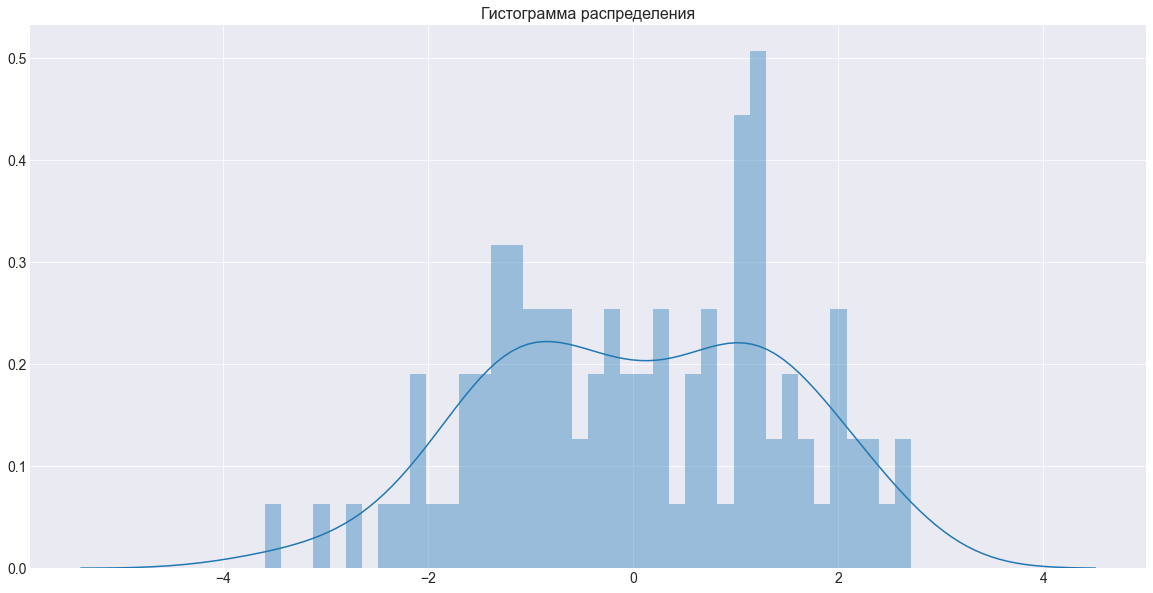

In [7]:
plt.figure(figsize=(20,10))
plt.title("Гистограмма распределения", fontsize=16)
plt.tick_params(labelsize=14)

sns.distplot(df['feature_2'], axlabel=False, bins=40)
plt.show()

## Вывод по графику "feature_2":
    Данный график отображает нармальное распределение с большой частатой в районе значения 1.
    Большая часть значения находится в диапазоне от -2,2 до 2,5

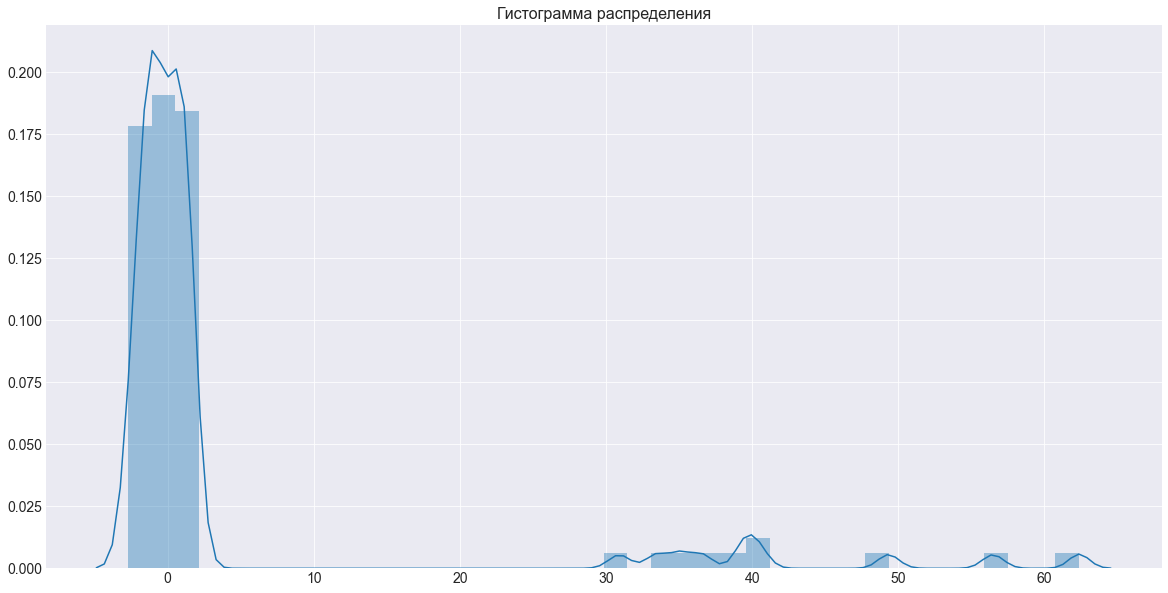

In [9]:
plt.figure(figsize=(20,10))
plt.title("Гистограмма распределения", fontsize=16)
plt.tick_params(labelsize=14)

sns.distplot(df['feature_3'], axlabel=False, bins=40)
plt.show()

## Вывод по графику "feature_3":
    Данный график имеет большие выбросы.

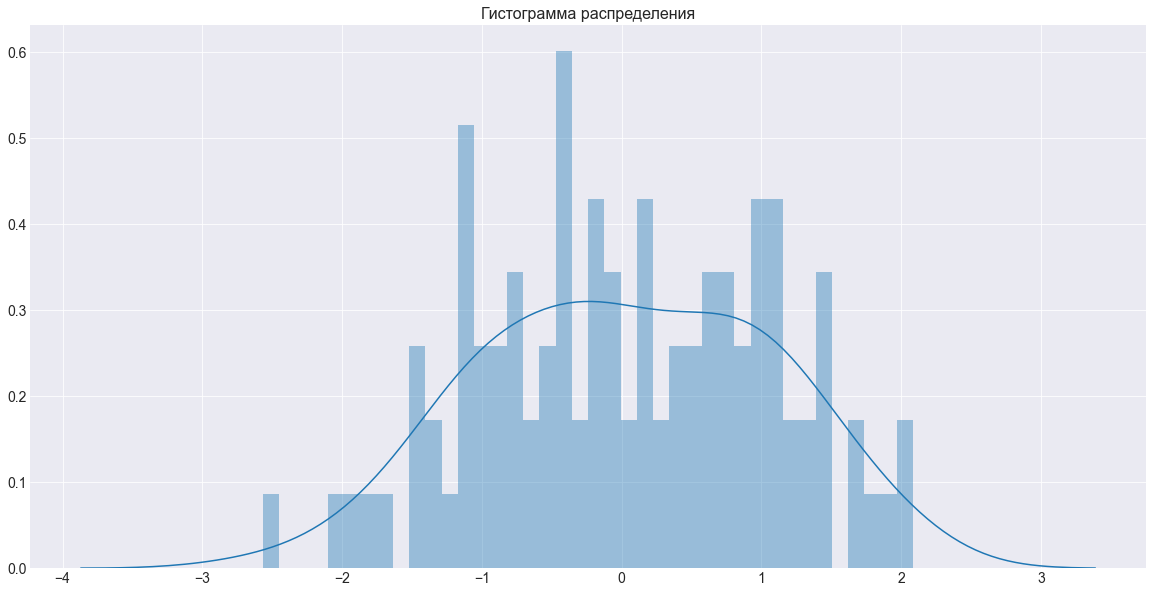

In [12]:
plt.figure(figsize=(20,10))
plt.title("Гистограмма распределения", fontsize=16)
plt.tick_params(labelsize=14)

sns.distplot(df['feature_4'], axlabel=False, bins=40)
plt.show()

## Вывод по графику "feature_4":
    В Данном графике распределение также близко к нормальному.
    Большая часть значений находится в диапозоне от -2 до 2

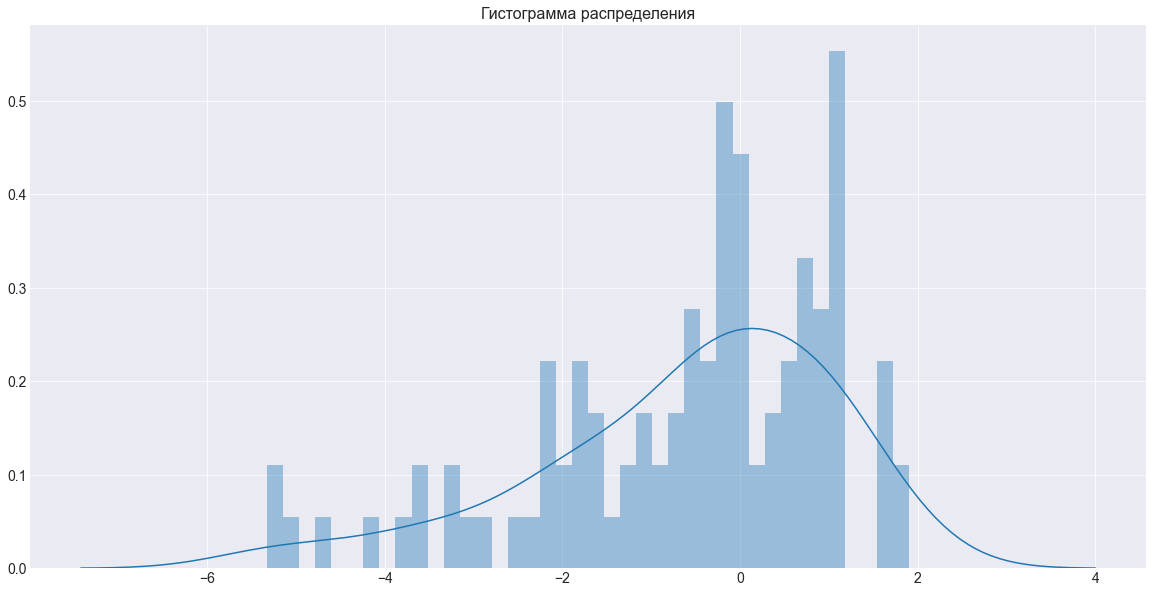

In [13]:
plt.figure(figsize=(20,10))
plt.title("Гистограмма распределения", fontsize=16)
plt.tick_params(labelsize=14)

sns.distplot(df['feature_5'], axlabel=False, bins=40)
plt.show()

## Вывод по графику "feature_5":
    В Данном графике распределение сдвинуто в право.
    Большая часть значений находится в диапозоне от -2 до 2.
    Причем значений выше 2 - нет, а значения от -6 до -2 встречаются относительно часто.

Постройте ящик с усами для каждой переменной. Опишите распределение данных. Прокомментируйте наличие или отсутствие выбросов.

In [20]:
for col in df.columns:
    df[col]= df[col].astype(float)
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,2.439930,-2.180961,33.468496,-1.927388,-5.321392
1,1.770580,-1.174880,0.989593,-1.139681,-2.080220
2,0.742817,-0.263483,0.168149,-0.332438,-0.195720
3,-1.510892,2.712571,-2.685643,2.058495,-4.098402
4,-0.483511,0.096511,-0.028703,0.168763,-0.046664


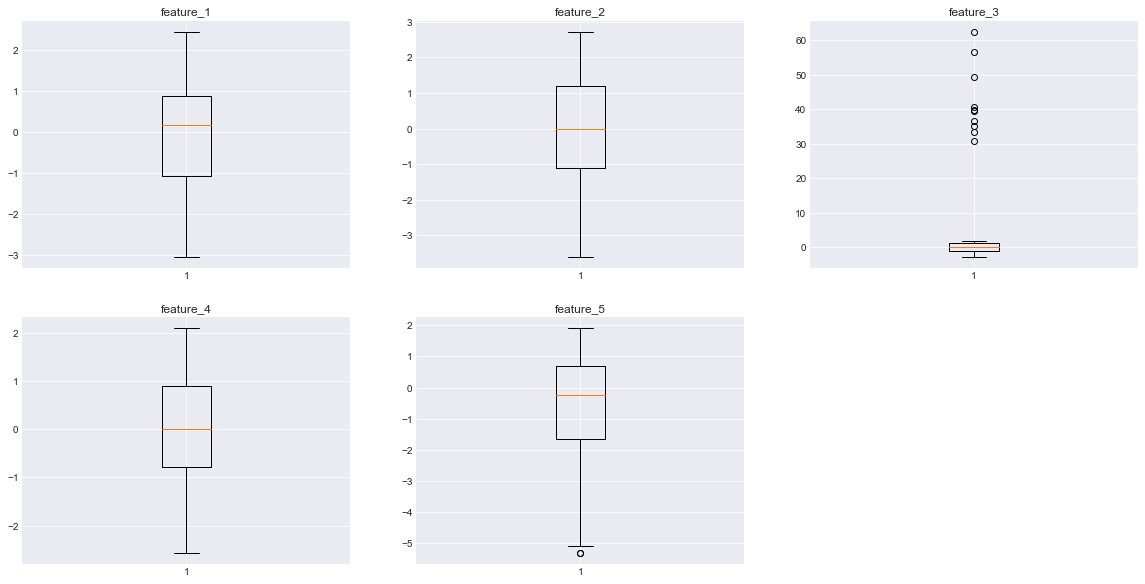

In [21]:
fig = plt.figure(figsize=(20,10))

i=231
for col in df:
    subplot = fig.add_subplot(i) 
    subplot.boxplot(df[col].values)
    subplot.set_title(col)
    i+=1

plt.show()

## Вывод:
Переменная features_3 имеет выбросы, т.к. есть очень больше занчения находящиеся за третьим квартилем. features_5, судя по графику так же имеет выброс. Если исключить выбросы, то переменные имеют схожие квантили. Посчитаем еще ассиметрию и эксцесс.

In [22]:
for col in df:
    print("Column ", col)
    print("kurtosis", kurtosis(df[col]))
    print("skew", skew(df[col]))
    print("-----------------------------------")

Column  feature_1
kurtosis -0.9224536985617497
skew -0.16561717398750475
-----------------------------------
Column  feature_2
kurtosis -0.7546732315109836
skew -0.1505876642777299
-----------------------------------
Column  feature_3
kurtosis 7.403063045481574
skew 2.9262040864568406
-----------------------------------
Column  feature_4
kurtosis -0.7102462902322091
skew -0.0951489985683936
-----------------------------------
Column  feature_5
kurtosis 0.5041836364333312
skew -0.9652681949411276
-----------------------------------


Из данных значений ничего непонятно, но похоже, что переменные в явном виде друг друга не дублируют. Значения ассиметриии эксцесса у всех переменных разные. 4 и 2 больше всех похожи друг на друга.

Допустим, мы хотим построить регрессионную модель по имеющимся данным и исследовать влияние остальных переменных на переменную `feature_4`. Постройте диаграммы рассеяния. Определите по графикам, какие независимые переменные имело бы смысл включить в модель регрессии?

<ipython-input-23-8803de1c18de>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['feature_3'] = df[df['feature_3']<20]['feature_3']


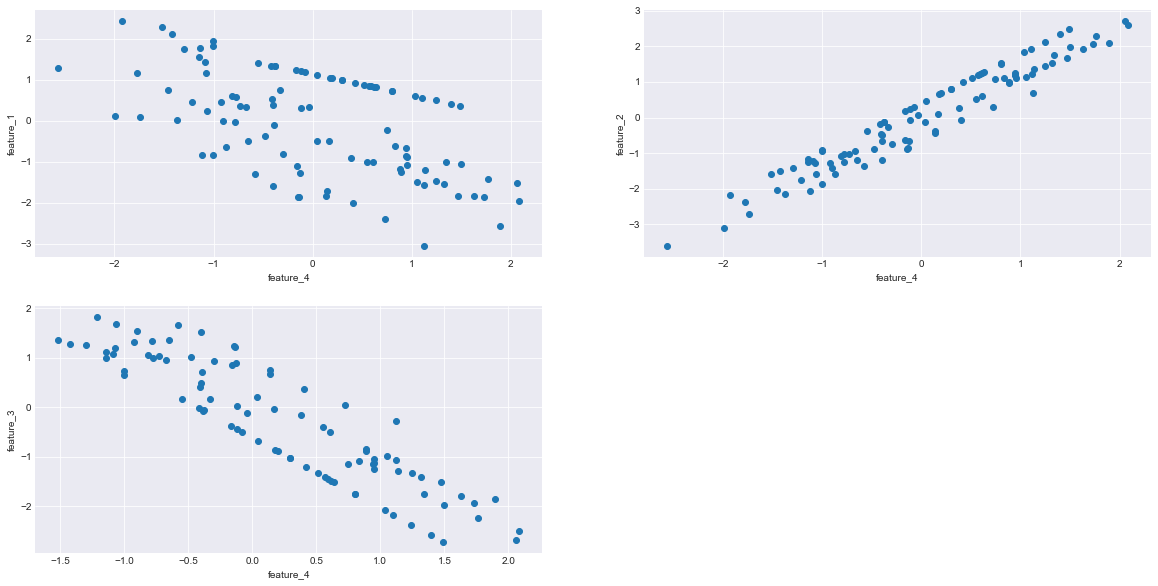

In [23]:
fig = plt.figure(figsize=(20,10))
feature_4 = df['feature_4'].values
df_test = df[['feature_1','feature_2', 'feature_3']]
#Убираем выбросы
df_test['feature_3'] = df[df['feature_3']<20]['feature_3']
i=221
for col in df_test:
    subplot = fig.add_subplot(i) 
    subplot.scatter(feature_4, df_test[col])
    subplot.set_xlabel('feature_4')
    subplot.set_ylabel(col)
    i+=1

plt.show()

## Вывод:
Переменная feature_4 явно связана с переменной feature_2, c feature_3 тоже есть связь но не такая очевидная, их точно надо включать в модель регрессии. C feature_1 неясно, возможно стоит и её включить если точность в итоге буде недостаточной.